In [1]:
import osmnx as ox
import networkx as nx
import numpy as np

import helper_functions as hf
import importlib
importlib.reload(hf)

<module 'helper_functions' from '/home/lema/Documents/diplomska/dai/helper_functions.py'>

In [8]:
import pickle

# graph = ox.graph_from_point((46.05407,14.52114), dist=10000, network_type="drive")
# file = open('lj.pkl', 'wb')
# pickle.dump(graph,file)
# file.close()


file = open('/home/lema/Documents/diplomska/lj.pkl', 'rb')
graph_ox = pickle.load(file)
file.close()
# print(type(graph))


# fig, ax = ox.plot_graph(graph,edge_color='y',node_size=0,save=True)
graph = nx.convert_node_labels_to_integers(nx.DiGraph(graph_ox))
# graph.nodes()
# graph.edges(data=True)



hf.fill_maxspeed(graph)

graph.edges(data=True)
times = {e: graph.edges()[e]["length"]/graph.edges()[e]["maxspeed"] for e in graph.edges()}
capacities = {e: 1 + graph.edges()[e]["length"]*graph.edges()[e]["maxspeed"]/1000 for e in graph.edges()}
nx.set_edge_attributes(graph, times,"c")
nx.set_edge_attributes(graph, capacities,"cap")

residential is set to 30
tertiary is set to 30
residential is set to 60
residential is set to 60
trunk_link is set to 110
tertiary is set to 50
primary_link is set to 50
trunk_link is set to 110
tertiary is set to 30
tertiary is set to 999
tertiary is set to 999
unclassified is set to 30
residential is set to 50
residential is set to 50
residential is set to 50
residential is set to 60
residential is set to 60
residential is set to 60
residential is set to 50
residential is set to 60
residential is set to 60
residential is set to 50
residential is set to 30
residential is set to 30
residential is set to 60
unclassified is set to 60
unclassified is set to 60
secondary is set to 60
residential is set to 60
secondary is set to 60
secondary is set to 60
tertiary is set to 60
secondary is set to 60
secondary is set to 60
secondary is set to 60
tertiary is set to 30
tertiary is set to 30
residential is set to 30
tertiary is set to 30
tertiary is set to 30
residential is set to 30
tertiary is

array([[<AxesSubplot: title={'center': 'cap'}>]], dtype=object)

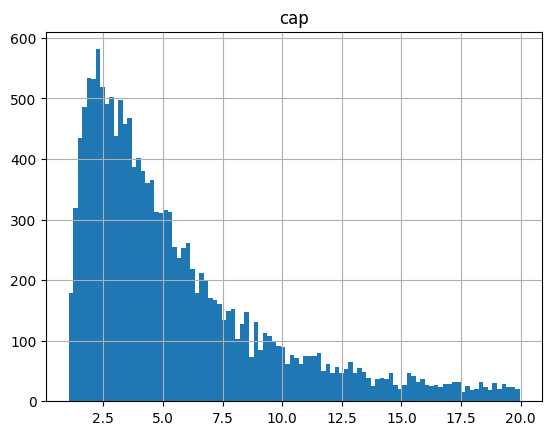

In [12]:
graph.edges(data=True)
df = nx.to_pandas_edgelist(graph, nodelist=graph.nodes())
df[["cap"]][df[["cap"]] < 20].hist(bins=100)

In [ ]:
obj,constraints,vp = hf.init_from_graph(graph,[(15,91,5)])